In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [2]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [3]:
# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 
df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


In [4]:
#Проверка теста из коробки на вычисления
print(df[['A','C']])
print()

#Вычислим по формуле
t  = (df['A'].mean() - df['C'].mean())/(df['A'].std()**2/df['A'].count()+df['C'].std()**2/df['C'].count())**0.5
t

    A   C
0  25  30
1  30  29
2  28  33
3  36  37
4  29  27



-0.6374552583116758

**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

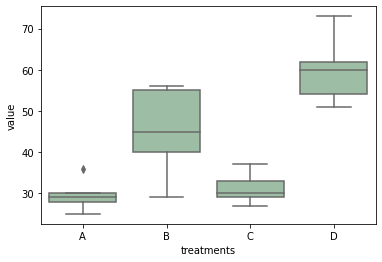

In [5]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
#sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту при желании


ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [6]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'],  df['B'], df['C'], df['D'])

print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [7]:
fvalue, pvalue = stats.f_oneway(df['A'], df['C'])
fvalue, pvalue

(0.40634920634920635, 0.5416380250488471)

### Начнем с датасета про морских гребешков

In [8]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [10]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [11]:
df['A']

0    25
1    30
2    28
3    36
4    29
Name: A, dtype: int64

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [12]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


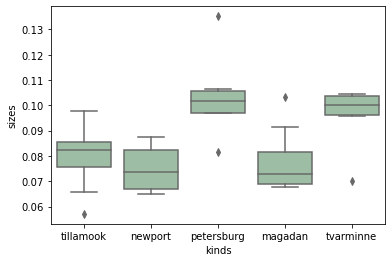

In [12]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = tillamook + newport +petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [13]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]*5  # Некий общий элемент
group_1 = group*5
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]*5

# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=6250.000, p=0.000
Разные распределения (отвергаем H0)


21.0 22.75


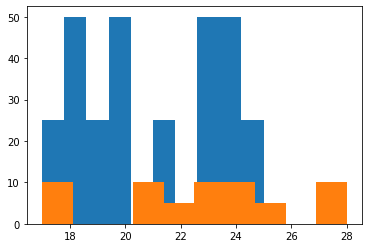

In [14]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2);

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


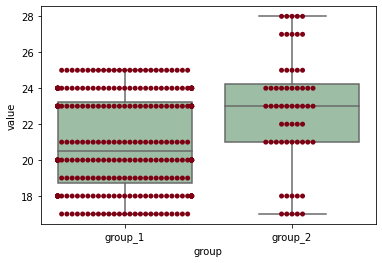

In [15]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()



**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [16]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

#stat, p = wilcoxon(group_1, group_2)
stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(array([5., 1., 2., 3., 1., 4., 4., 2., 0., 2.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <BarContainer object of 10 artists>)

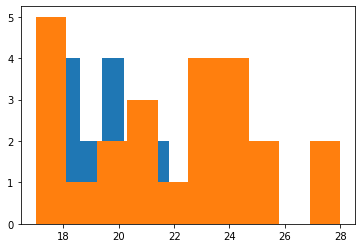

In [17]:
plt.hist(group_1)
plt.hist(group_2)

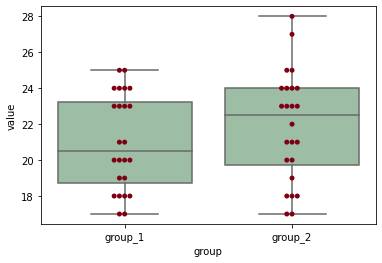

In [18]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()


# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)
Эффект не подтвержден (не отвергаем H0)


(array([5., 1., 2., 3., 1., 4., 4., 2., 0., 2.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <BarContainer object of 10 artists>)

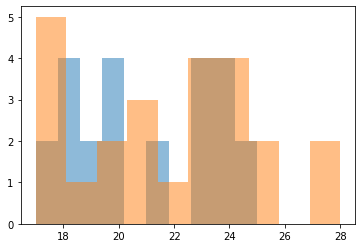

In [24]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

print(stats.ttest_ind(A, B)) # применяем тест Стьюдента
alpha = 0.05
if p > alpha:
    print('Эффект не подтвержден (не отвергаем H0)')
else:
    print('Эффект есть (отвергаем H0)')
plt.hist(group_1, alpha = 0.5)
plt.hist(group_2, alpha = 0.5)

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [40]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

from scipy.stats import mannwhitneyu
 
# Сравнение групп
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print(stat, p)

alpha = 0.05
if p > alpha:
    print('Эффект не подтвержден (не отвергаем H0)')
else:
    print('Эффект есть (отвергаем H0)')
    
df = pd.DataFrame(A,B).reset_index()
df.columns = ['A', 'B']
df

4343.0 0.054347680446611354
Эффект не подтвержден (не отвергаем H0)


,A,B
0,121.694372,63.483642
1,17.287024,2.417810
2,-81.045742,-3.536954
3,-92.553899,-68.599557
4,65.911018,10.751461
...,...,...
95,27.703331,19.148189
96,26.636666,36.760015
97,66.925797,-26.922210
98,46.579689,44.446109


<AxesSubplot:>

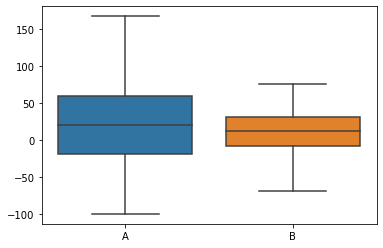

In [41]:
sns.boxplot(data = df)

In [ ]:
# визуально выборка  по группе А без препарата полностью покрывает выборку В, поэтому не может отвергнуть Н0 и судить об эффективности препарата

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [71]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]


F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


In [73]:
print(stats.ttest_ind(water, mineral))
print(f_oneway(water, mineral))

Ttest_indResult(statistic=0.10129659201078253, pvalue=0.919834021847144)
F_onewayResult(statistic=0.010260999552998775, pvalue=0.9198340218471527)


In [ ]:
# отличий между водой и минералкой почти нет

In [59]:
print(len(water),len(nutri),len(mineral))

20 21 21


In [60]:
water.append(None)
water

[1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1, None]

In [65]:
df = pd.DataFrame({'water': water, 'nutri': nutri, 'mineral': mineral })
df.head()

,water,nutri,mineral
0,1.0,1,2
1,2.0,2,1
2,3.0,4,1
3,4.0,6,3
4,2.0,5,2


<AxesSubplot:>

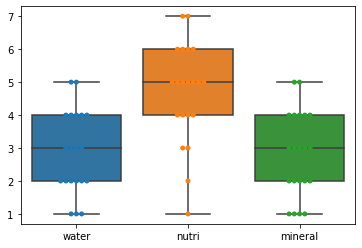

In [66]:
sns.boxplot(data=df)
sns.swarmplot(data=df)

In [ ]:
# эффект от удобрения определенно есть

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [88]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

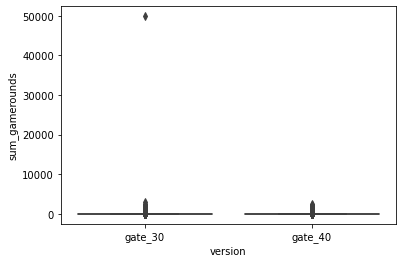

In [137]:
sns.boxplot(y = data['sum_gamerounds'], x = data['version'], data = data)

In [144]:
data['sum_gamerounds'].quantile(q=0.95)

221.0

In [154]:
df1 = data.loc[data['sum_gamerounds'] <= data['sum_gamerounds'].quantile(q=0.95), :]
df1

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

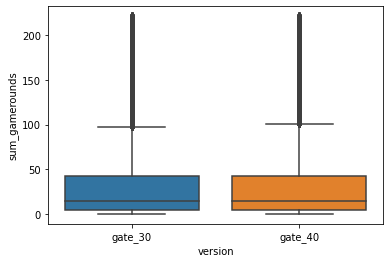

In [155]:
sns.boxplot(y = df1['sum_gamerounds'], x = df1['version'], data = df1)

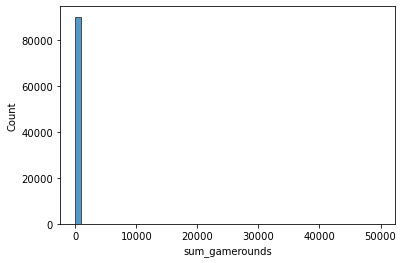

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Count'>

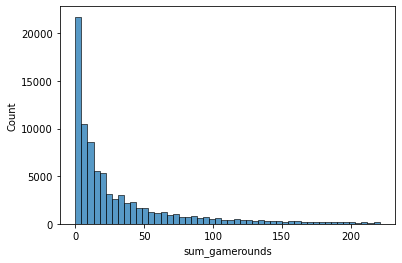

In [161]:
sns.histplot(data['sum_gamerounds'], kde=False, bins=50)
plt.show()
sns.histplot(df1['sum_gamerounds'], kde=False, bins=50)

In [156]:
#Сгрупируем результаты теста по версиям игры.
df_ = data.groupby('version').count().reset_index()
df_

,version,userid,sum_gamerounds,retention_1,retention_7
0,gate_30,44700,44700,44700,44700
1,gate_40,45489,45489,45489,45489


In [157]:
df1_ = df1.groupby('version').count().reset_index()
df1_

,version,userid,sum_gamerounds,retention_1,retention_7
0,gate_30,42463,42463,42463,42463
1,gate_40,43243,43243,43243,43243


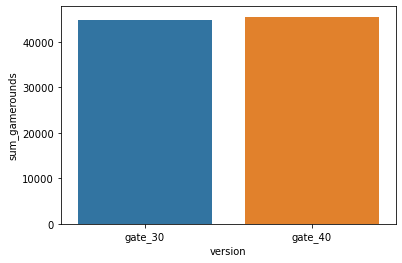

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

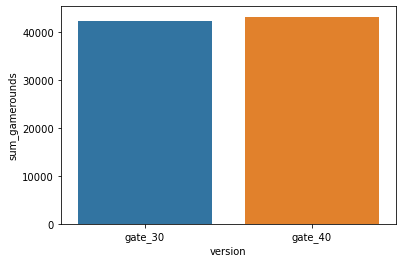

In [158]:
sns.barplot(x='version', y='sum_gamerounds', data=df_)
plt.show()
sns.barplot(x='version', y='sum_gamerounds', data=df1_)

In [ ]:
# распределение кол-ва сыгранных раундов ненормальное, в обоих вариантах есть много выбросов,
# в gate_30 есть значительные, которые могут повлиять на некоторые статистики
# но несмотря на наличие или отсутствие фильтрации визуально суммарное кол-во раундов для обоих вариантов примерно одинаково

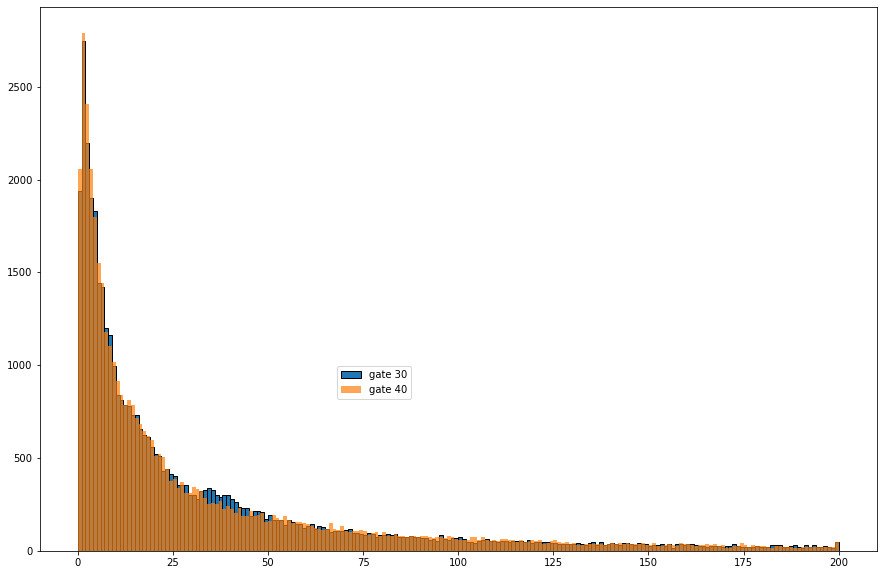

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

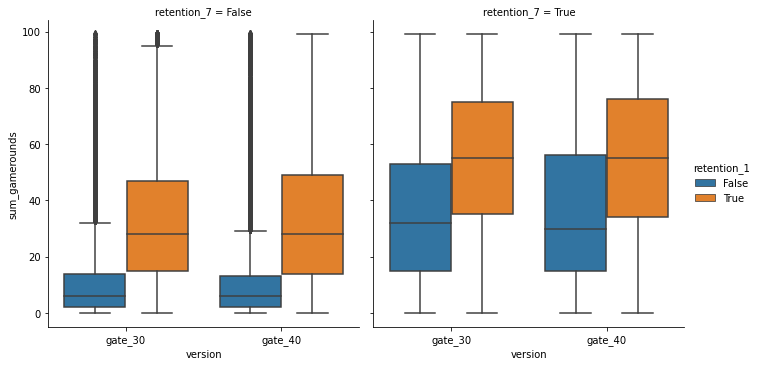

In [163]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
# визуально для gate_40 невернувшихся через неделю чуть больше

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

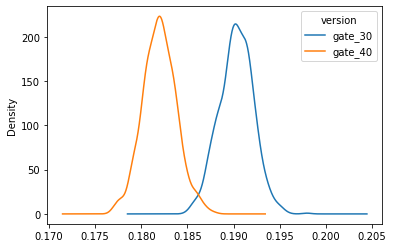

In [166]:
# #Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

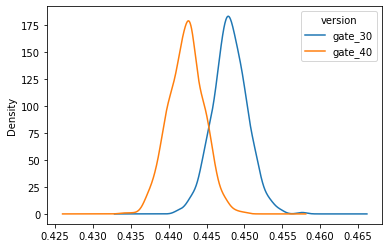

In [170]:
plt.figure(figsize=(15, 10))

boot_2d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_2d.append(boot_mean)

boot_2d = pd.DataFrame(boot_2d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_2d.plot(kind='density')

In [ ]:
#  bootstrapped демонстрирует, что различия всё-таки есть, если каждую группу случайно разбить на выборки
# и посчитать статистику среднего графики разъедутся, для gate_30 среднее кол-во вернувшихся в игру через день и неделю выше

In [173]:

from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (f, p))
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.794, p=0.373
Statistics=1009027049.500, p=0.025


In [ ]:
#  дисперсионный анализ не выявил различий, манна-уитни показывает, что различия всё-таки есть

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [249]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [177]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [250]:
pokemon_grass = pokemon.loc[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) |
                            ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))][['Attack']]
pokemon_grass.head()

,Attack
0,49
1,62
2,82
3,100
48,50


In [251]:
pokemon_rock = pokemon.loc[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) |
                            ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))][['Attack']]
pokemon_rock.head()

,Attack
80,80
81,95
82,120
103,45
119,85


(array([ 4.,  3.,  3.,  3.,  7.,  3., 11., 11.,  5.,  4.,  4.,  6.,  8.,
        10.,  3.,  5.,  1.,  0.,  0.,  2.]),
 array([ 27.  ,  32.25,  37.5 ,  42.75,  48.  ,  53.25,  58.5 ,  63.75,
         69.  ,  74.25,  79.5 ,  84.75,  90.  ,  95.25, 100.5 , 105.75,
        111.  , 116.25, 121.5 , 126.75, 132.  ]),
 <BarContainer object of 20 artists>)

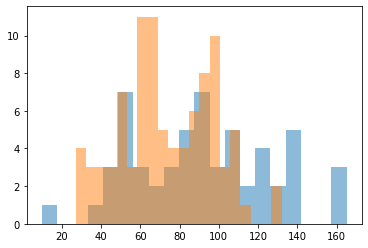

In [252]:
plt.hist(pokemon_rock, bins=20, alpha=0.5)
plt.hist(pokemon_grass, bins=20, alpha=0.5)

In [ ]:
# распределение не похоже на нормальное, критерий Стьюдента посмотрим, но также применим манна-уитни

In [253]:
print(stats.ttest_ind(pokemon_rock, pokemon_grass)) # применяем тест Стьюдента
alpha = 0.05
if p > alpha:
    print('Различий нет (не отвергаем H0)')
else:
    print('Различия есть (отвергаем H0)')

Ttest_indResult(statistic=array([3.72945758]), pvalue=array([0.00027333]))
Различия есть (отвергаем H0)


In [254]:
stat, p = mannwhitneyu(pokemon_rock, pokemon_grass) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1816.500, p=0.001
Разные распределения (отвергаем H0)


<AxesSubplot:>

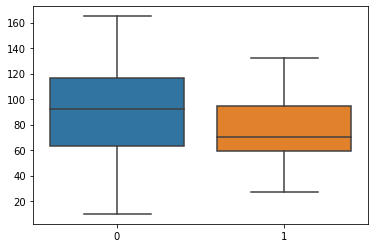

In [255]:
sns.boxplot(data = [pokemon_rock, pokemon_grass])

In [ ]:
# статистически значимые различия между группами есть, покемоны в классе rock имеют более сильную обычную атаку
# проффесор не прав

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [260]:
pokemon_water = pokemon.loc[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) |
                            ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))][['Speed']]

In [261]:
pokemon_normal = pokemon.loc[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) |
                            ((pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water'))][['Speed']]

(array([ 1.,  1.,  3.,  5.,  1.,  5., 11.,  6.,  9.,  2., 12.,  5.,  6.,
        10., 11.,  2.,  6.,  2.,  2.,  1.]),
 array([  5. ,  11.5,  18. ,  24.5,  31. ,  37.5,  44. ,  50.5,  57. ,
         63.5,  70. ,  76.5,  83. ,  89.5,  96. , 102.5, 109. , 115.5,
        122. , 128.5, 135. ]),
 <BarContainer object of 20 artists>)

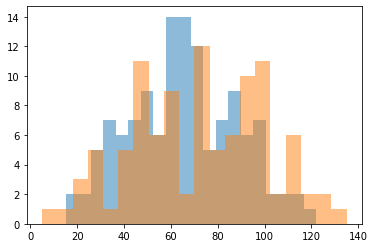

In [262]:
plt.hist(pokemon_water, bins=20, alpha=0.5)
plt.hist(pokemon_normal, bins=20, alpha=0.5)

In [ ]:
# распределение похоже на нормальное,посмотрим критерий Стьюдента ,чтобы сравнить средние

In [263]:
print(stats.ttest_ind(pokemon_water, pokemon_normal)) # применяем тест Стьюдента
alpha = 0.05
if p > alpha:
    print('Различий нет (не отвергаем H0)')
else:
    print('Различия есть (отвергаем H0)')

Ttest_indResult(statistic=array([-2.15091333]), pvalue=array([0.03255354]))
Различия есть (отвергаем H0)


<AxesSubplot:>

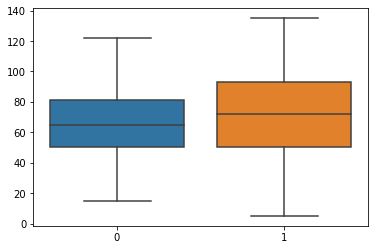

In [266]:
sns.boxplot(data = [pokemon_water, pokemon_normal])

In [ ]:
# статистически значимые различия между группами есть, покемоны в классе normal в среднем быстрее
# проффесор не прав

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<AxesSubplot:xlabel='Speed', ylabel='Count'>

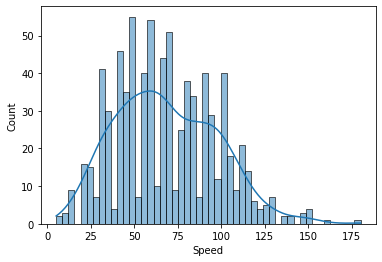

In [302]:
sns.histplot(pokemon['Speed'], kde=True, bins=50)

In [ ]:
# распределение конечно строго нельзя назвать нормальным, один хвост явно длиннее другого, есть дополнительный пик 

In [304]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
pokemon_treathed_speed = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)][['Speed']]
pokemon_treathed_speed

,Speed
19,145
71,150
428,150
476,135


In [313]:
print(stats.ttest_ind(pokemon_not_treathed_speed, pokemon_treathed_speed)) # применяем тест Стьюдента
alpha = 0.05
if p > alpha:
    print('Различий нет (не отвергаем H0)')
else:
    print('Различия есть (отвергаем H0)')

Ttest_indResult(statistic=array([-5.3854074]), pvalue=array([9.51510118e-08]))
Различия есть (отвергаем H0)


<AxesSubplot:>

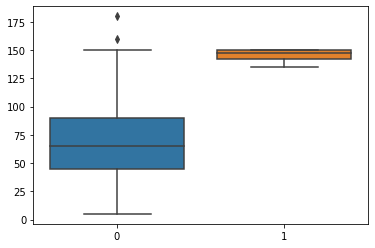

In [315]:
sns.boxplot(data = [pokemon_not_treathed_speed, pokemon_treathed_speed])

In [ ]:
# сыворотка работает, но следует отметить, что выборки всё же очень сильно отличаются по объему и в меньшей нельзя говорить о нормальности распределения

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [28]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# тоже самое, что в задании 3 

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [355]:
pokemon_legend = pokemon[pokemon['Legendary'] == True][['HP', 'Attack', 'Defense']].reset_index()
pokemon_legend.rename(columns = {'index': 'pid'}, inplace = True)
pokemon_legend['sum'] = pokemon_legend['HP']+pokemon_legend['Attack']+pokemon_legend['Defense']
pokemon_legend['multiply'] = pokemon_legend['HP']*pokemon_legend['Attack']*pokemon_legend['Defense']
pokemon_legend

,pid,HP,Attack,Defense,sum,multiply
0,156,90,85,100,275,765000
1,157,90,90,85,265,688500
2,158,90,100,90,280,810000
3,162,106,110,90,306,1049400
4,163,106,190,100,396,2014000
...,...,...,...,...,...,...
60,795,50,100,150,300,750000
61,796,50,160,110,320,880000
62,797,80,110,60,250,528000
63,798,80,160,60,300,768000


In [356]:
pokemon_not_legend = pokemon[pokemon['Legendary'] == False][['HP', 'Attack', 'Defense']].reset_index()
pokemon_not_legend.rename(columns = {'index': 'pid'}, inplace = True)
pokemon_not_legend['sum'] = pokemon_not_legend['HP']+pokemon_not_legend['Attack']+pokemon_not_legend['Defense']
pokemon_not_legend['multiply'] = pokemon_not_legend['HP']*pokemon_not_legend['Attack']*pokemon_not_legend['Defense']
pokemon_not_legend

,pid,HP,Attack,Defense,sum,multiply
0,0,45,49,49,143,108045
1,1,60,62,63,185,234360
2,2,80,82,83,245,544480
3,3,80,100,123,303,984000
4,4,39,52,43,134,87204
...,...,...,...,...,...,...
730,787,85,100,122,307,1037000
731,788,55,69,85,209,322575
732,789,95,117,184,396,2045160
733,790,40,30,35,105,42000


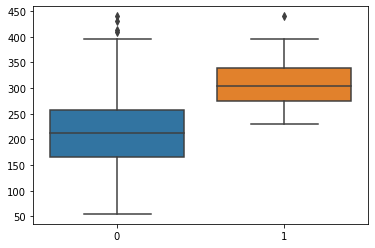

<AxesSubplot:>

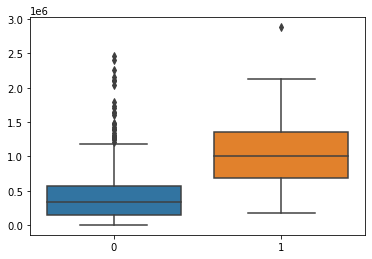

In [362]:
sns.boxplot(data = [pokemon_not_legend['sum'], pokemon_legend['sum']])
plt.show()
sns.boxplot(data = [pokemon_not_legend['multiply'], pokemon_legend['multiply']])

In [ ]:
# визуально легендарные покемоны по характеристикам лучше

In [363]:
stats.ttest_ind(pokemon_not_legend[['sum', 'multiply']], pokemon_legend[['sum', 'multiply']]) # применяем тест Стьюдента

Ttest_indResult(statistic=array([-11.59185237, -13.26325341]), pvalue=array([7.97094221e-29, 1.99266431e-36]))

In [364]:
stat, p = mannwhitneyu(pokemon_not_legend, pokemon_legend) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=-1103677.000, p=0.000
Разные распределения (отвергаем H0)


In [ ]:
#  критерий показывает, что различия есть,  они значимы и не случайны (очень малый p-value, отвергаем Н0

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [366]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [404]:
pokemon_rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')][['Defense']]
pokemon_rock.head()

,Defense
80,100
81,115
82,130
103,160
119,95


In [411]:
pokemon_ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')][['Defense']]

In [406]:
pokemon_steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')][['Defense']]

In [407]:
pokemon_ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')][['Defense']]

In [ ]:
# т.к. сравниваем более 2х групп будем применять дисперсионный анализ

<AxesSubplot:>

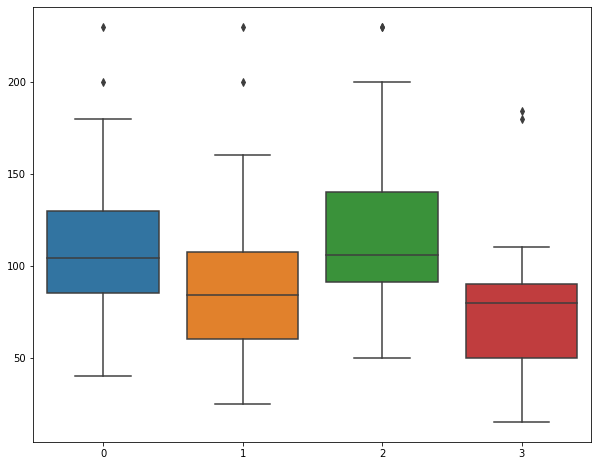

In [421]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=[pokemon_rock, pokemon_ground, pokemon_steel, pokemon_ice])

In [414]:
# визуально отличие есть

In [410]:
F, p = f_oneway(pokemon_rock, pokemon_rock, pokemon_steel, pokemon_ice)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

[8.68292064] [1.92649758e-05]
Разное распределение (отклоняем H0)


In [ ]:
# дисперсионный анализ также указывает на значимость отличий между группами, p-value мало